In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
%matplotlib inline

In [2]:
words = open('Names.txt').read().splitlines()
print(words[:10])

['Aaban', 'Aabharan', 'Aabhas', 'Aabhat', 'Aabheer', 'Aabheer', 'Abheer', 'Aabher', 'Aabi', 'Aabilesh']


In [3]:
len(words)

55691

In [4]:
chars = sorted(list(set(''.join(words))))
#stoi = {s:i + 1 for i,s in chars}
print(chars)

[' ', '-', '.', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
words = [w.lower() for w in words]
print(words[:10])

['aaban', 'aabharan', 'aabhas', 'aabhat', 'aabheer', 'aabheer', 'abheer', 'aabher', 'aabi', 'aabilesh']


In [6]:
words = [w.replace(' ','').replace('-','').replace('.','') for w in words]
print(words[:10])

['aaban', 'aabharan', 'aabhas', 'aabhat', 'aabheer', 'aabheer', 'abheer', 'aabher', 'aabi', 'aabilesh']


In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)
vocab_size = len(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [8]:
N = torch.zeros(28,28, dtype=int)
N[:5]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

In [9]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        
print(N[:5])

tensor([[    0,  6774,  1841,  1081,  3138,   708,   142,  1532,  1705,   918,
          2562,  4321,  1377,  3959,  3607,   213,  3356,    16,  3443,  5320,
          2941,   660,  4191,    97,     1,  1661,   127,     0],
        [16717,  4618,  1521,   320,  2257,   505,    59,  1611,  1746,  2166,
          2201,  3074,  4051,  4057, 26410,    22,   862,     8, 11221,  5629,
          5349,   264,  3737,   163,    70,  2808,   242,     0],
        [   86,  1841,    37,     0,    40,   300,     0,     1,  1374,   950,
             8,     0,    12,     0,     6,   125,     2,     0,   268,     7,
             6,   219,     0,     1,     0,    42,     1,     0],
        [   18,   207,     0,    15,     0,    26,     0,     0,  1807,    59,
             0,   118,     6,     0,     1,    23,     0,     0,     4,     4,
             3,     7,     0,     0,     0,    25,     0,     0],
        [  405,  1934,    10,    30,   124,  1434,     0,    10,  3141,  1121,
             5,    10,   

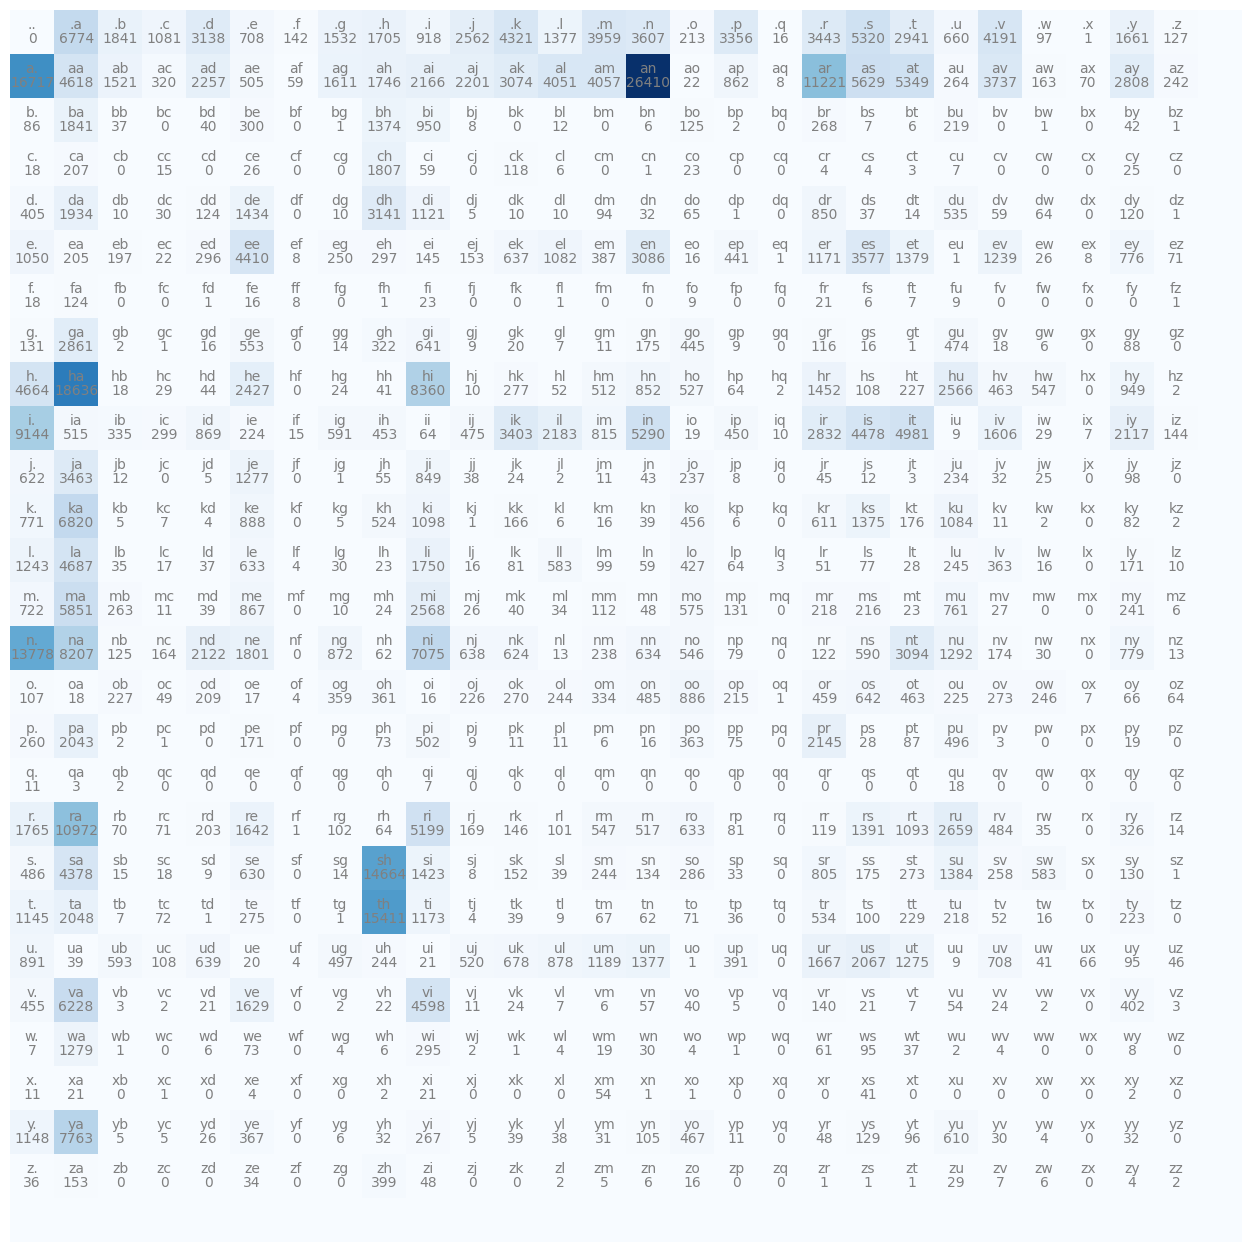

In [10]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [11]:
block_size = 5 	

def build_dataset(words):
    X,Y = [],[]
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[:n2]) 

torch.Size([404301, 5]) torch.Size([404301])
torch.Size([50562, 5]) torch.Size([50562])
torch.Size([454863, 5]) torch.Size([454863])


In [37]:
n_embd = 32
n_hidden = 200

g = torch.Generator().manual_seed(2147483647)

C = torch.randn((vocab_size, n_embd),				generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden),	generator=g) * 0.1
#b1 = torch.randn((n_hidden),						generator=g)
W2 = torch.randn((n_hidden, vocab_size),			generator=g) * 0.1
b2 = torch.randn((vocab_size),						generator=g) * 0

bngain = torch.ones((1,n_hidden))
bnbias = torch.zeros((1,n_hidden))
running_bnmean = torch.zeros((1,n_hidden))
running_bnstd = torch.ones((1,n_hidden))

parameters = [C, W1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True
    



38691


In [38]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    
	ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
	Xb, Yb = Xtr[ix], Ytr[ix]

	emb = C[Xb]
	embcat = emb.view(emb.shape[0], -1)
	hpreact = embcat @ W1
	bnmeani = hpreact.mean(0, keepdim=True)
	bnstdi = hpreact.std(0, keepdim=True).clamp(min=1e-5)
	eps = 1e-5
	hpreact = (bngain * (hpreact - bnmeani)/(bnstdi+eps)) + bnbias

	with torch.no_grad():
		running_bnmean = 0.999 * running_bnmean + 0.001 * bnmeani
		running_bnstd = 0.999 * running_bnstd + 0.001 * bnstdi
	#print("logits has nan:", torch.isnan(logits).any().item())
	#print("Yb has bad values:", (Yb >= vocab_size).any().item())
	#break
	h = torch.tanh(hpreact)
	logits = h @ W2 + b2
	#if torch.isnan(logits).any():
	#	print("NaNs in logits at step", i)
	#	print("hpreact sample:", hpreact[0])
	#	break
	loss = F.cross_entropy(logits, Yb)
	#print(loss)
	
	for p in parameters:
		p.grad = None
	#print(p.grad)
	loss.backward()
	

	if i % 10000 == 0: # print every once in a while
		print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')

	if i<50000:
		lr = 0.1
	elif i < 100000:
		lr = 0.05
	elif i < 150000:
		lr = 0.025
	else:
		lr = 0.01
	for p in parameters:
		p.data += -lr * p.grad
	lossi.append(loss.log10().item())
#print('grad:',p.grad)	
print('loss:',loss.item())

      0/ 200000: 3.4738


  10000/ 200000: 1.7951
  20000/ 200000: 1.6347
  30000/ 200000: 1.6548
  40000/ 200000: 1.8536
  50000/ 200000: 1.8957
  60000/ 200000: 1.7322
  70000/ 200000: 1.7975
  80000/ 200000: 1.9856
  90000/ 200000: 1.5947
 100000/ 200000: 2.0086
 110000/ 200000: 1.5677
 120000/ 200000: 1.9949
 130000/ 200000: 1.7165
 140000/ 200000: 1.9524
 150000/ 200000: 1.7111
 160000/ 200000: 2.0803
 170000/ 200000: 1.8534
 180000/ 200000: 1.3571
 190000/ 200000: 1.7725
loss: 2.0464937686920166


In [57]:
logits.shape, Yb.shape

(torch.Size([32, 27]), torch.Size([32]))

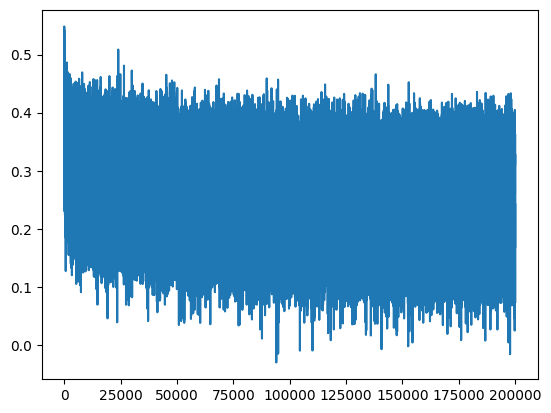

In [39]:

plt.plot(lossi)

In [40]:
@torch.no_grad()

def losss(data):
    x,y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte)
	}[data]
    emb = C[x]
    embcat = emb.view(emb.shape[0], -1)
    hpreact = embcat @ W1
    hpreact = (bngain * ((hpreact - running_bnmean)/running_bnstd) + bnbias)
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y)
    print(data,loss.item())

losss('train')    
losss('val')

train 1.7626773118972778
val 1.81400728225708


In [41]:
for _ in range(20):
    out = []
    context = [0] * block_size  
    
    while True:
        x = torch.tensor([context])
        emb = C[x]                            
        embcat = emb.view(1, -1)              
        hpreact = embcat @ W1                 
        hpreact = (hpreact - running_bnmean) / running_bnstd
        hpreact = bngain * hpreact + bnbias
        h = torch.tanh(hpreact)               
        logits = h @ W2 + b2                  
        
        probs = F.softmax(logits, dim=1)      
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

        context = context[1:] + [ix]

    print(''.join(out))


kalithiyan.
jethun.
atrivalli.
nishkar.
mashavarathivan.
pirmala.
aitushini.
alzan.
omadhunyan.
raethikash.
harchiya.
padma.
yaahini.
devyakrut.
paveesiya.
vithanya.
rasanthan.
pragitha.
yaran.
marshan.


In [153]:
class FlattenCon(torch.nn.Module):
    def __init__(self, n):
        super().__init__()
        self.n = n

    def forward(self, x):
        if x.ndim != 3:
            return x  # Only reshape 3D tensors

        B, T, C = x.shape
        if T % self.n != 0:
            raise ValueError(f"T={T} not divisible by n={self.n}")
        x = x.view(B, T // self.n, C * self.n)
        return x



class BatchBlock(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = torch.nn.Linear(in_features, out_features, bias=False)
        self.norm = torch.nn.BatchNorm1d(out_features)
        self.act = torch.nn.Tanh()

    def forward(self, x):
        if x.ndim == 3:
            x = x.view(x.size(0), -1)  # Flatten [B, T, C] -> [B, T*C]
        x = self.linear(x)
        x = self.norm(x)
        x = self.act(x)
        return x


In [172]:
n_embd = 12
n_hidden = 128

model = torch.nn.Sequential(
    torch.nn.Embedding(vocab_size, n_embd),
    torch.nn.Flatten(), 
    torch.nn.Linear(n_embd * block_size, n_hidden, bias=False), 
    torch.nn.BatchNorm1d(n_hidden), 
    torch.nn.ReLU(),
    

    torch.nn.Linear(n_hidden, n_hidden, bias=False), 
    torch.nn.BatchNorm1d(n_hidden), 
    torch.nn.ReLU(),
    

    torch.nn.Linear(n_hidden, n_hidden, bias=False), 
    torch.nn.BatchNorm1d(n_hidden), 
    torch.nn.ReLU(),
    
    torch.nn.Linear(n_hidden, vocab_size)
)

parameters = model.parameters()

print(sum(p.nelement() for p in parameters))

for p in parameters:
    p.requires_grad = True
    



49631


In [173]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    Xb, Yb = Xtr[ix], Ytr[ix]
    logits = model(Xb)
    loss = F.cross_entropy(logits, Yb)
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    
print(loss.item())

      0/ 200000: 3.4662
  10000/ 200000: 3.4723
  20000/ 200000: 3.3905
  30000/ 200000: 3.4045
  40000/ 200000: 3.3616
  50000/ 200000: 3.4086
  60000/ 200000: 3.4184
  70000/ 200000: 3.4851
  80000/ 200000: 3.4590
  90000/ 200000: 3.4596
 100000/ 200000: 3.5034
 110000/ 200000: 3.3972
 120000/ 200000: 3.4190
 130000/ 200000: 3.4771
 140000/ 200000: 3.3031
 150000/ 200000: 3.4083
 160000/ 200000: 3.3002
 170000/ 200000: 3.5808
 180000/ 200000: 3.3920
 190000/ 200000: 3.3844
3.433546543121338


In [122]:
Xb.shape

torch.Size([32, 3])

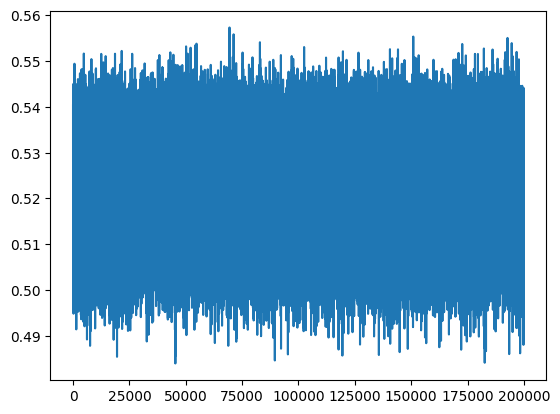

In [169]:
plt.plot(lossi)

In [58]:
# build the dataset
block_size = 16 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
	X, Y = [], []
	
	for w in words:
		context = [0] * block_size
		for ch in w + '.':
			ix = stoi[ch]
			X.append(context)
			Y.append(ix)
			context = context[1:] + [ix] # crop and append

	X = torch.tensor(X)
	Y = torch.tensor(Y)
	print(X.shape, Y.shape)
	return X, Y

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([404301, 16]) torch.Size([404301])
torch.Size([50562, 16]) torch.Size([50562])
torch.Size([50594, 16]) torch.Size([50594])


In [60]:
# -----------------------------------------------------------------------------------------------
class Linear:
  
  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5 # note: kaiming init
    self.bias = torch.zeros(fan_out) if bias else None
  
  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out
  
  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# -----------------------------------------------------------------------------------------------
class BatchNorm1d:
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      if x.ndim == 2:
        dim = 0
      elif x.ndim == 3:
        dim = (0,1)
      xmean = x.mean(dim, keepdim=True) # batch mean
      xvar = x.var(dim, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out
  
  def parameters(self):
    return [self.gamma, self.beta]
Ytr
# -----------------------------------------------------------------------------------------------
class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Embedding:
  
  def __init__(self, num_embeddings, embedding_dim):
    self.weight = torch.randn((num_embeddings, embedding_dim))
    
  def __call__(self, IX):
    self.out = self.weight[IX]
    return self.out
  
  def parameters(self):
    return [self.weight]

# -----------------------------------------------------------------------------------------------
class FlattenConsecutive:
  
  def __init__(self, n):
    self.n = n
    
  def __call__(self, x):
    B, T, C = x.shape
    x = x.view(B, T//self.n, C*self.n)
    if x.shape[1] == 1:
      x = x.squeeze(1)
    self.out = x
    return self.out
  
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Sequential:
  
  def __init__(self, layers):
    self.layers = layers
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    self.out = x
    return self.out
  
  def parameters(self):
    # get parameters of all layers and stretch them out into one list
    return [p for layer in self.layers for p in layer.parameters()]

In [61]:
n_embd = 24 # the dimensionality of the character embedding vectors
n_hidden = 128 # the number of neurons in the hidden layer of the MLP
model = Sequential([
	Embedding(vocab_size, n_embd),
	FlattenConsecutive(2), Linear(n_embd * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
	FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
	FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
	FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
	Linear(n_hidden, vocab_size),
])

# parameter init
with torch.no_grad():
	model.layers[-1].weight *= 0.1 # last layer make less confident

parameters = model.parameters()
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  	p.requires_grad = True

109603


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
  
	# minibatch construct
	ix = torch.randint(0, Xtr.shape[0], (batch_size,))
	Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
	
	# forward pass
	logits = model(Xb)
	#print(logits)      # if we sample the special '.' token, break

	loss = F.cross_entropy(logits, Yb) # loss function
	
	# backward pass
	for p in parameters:
		p.grad = None
	loss.backward()
	
	# update: simple SGD
	lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
	for p in parameters:
		p.data += -lr * p.grad

	# track stats
	if i % 10000 == 0: # print every once in a while
		print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
	lossi.append(loss.log10().item())

	#break

      0/ 200000: 3.2774
  10000/ 200000: 1.9057
  20000/ 200000: 1.6230


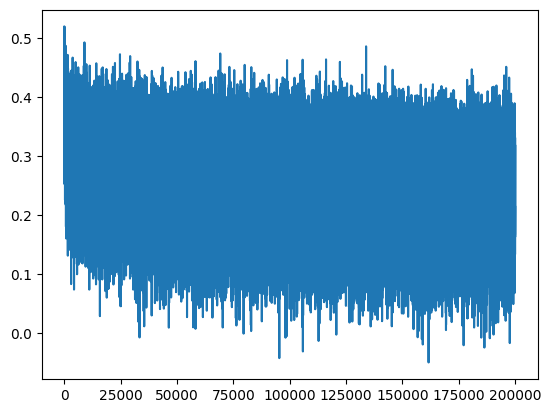

In [46]:
plt.plot(lossi)

In [ ]:


# sample from the model
for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      logits = model(torch.tensor([context]))
      probs = F.softmax(logits, dim=1)
      #print('probs:',probs)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out)) # decode and print the generated word



probs: tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan]], grad_fn=<SoftmaxBackward0>)


/tmp/ipykernel_150499/1678807919.py:39: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  xvar = x.var(dim, keepdim=True) # batch variance


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

In [49]:
print(probs)

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan]], grad_fn=<SoftmaxBackward0>)
